In [1]:
#sparting spark and reading Reddit
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Reddit").getOrCreate()
df = None
df = spark.read.csv("s3a://andrew-bierbaum-insight-test-dataset/Reddit/Reddit_Comments_2006-000000000*.csv.gz", header=True,multiLine=True, escape='"')

In [2]:
#spark.sql.caseSensitive = False
#sqlContext.sql("set spark.sql.caseSensitive=false")

In [3]:
#showing the start of the data and format
df.show(5)
df.printSchema()

+--------------------+------------+--------+----+---------+-----------------+-----+-----------+------------+-------+---------+-----+------------+----------------+------+-----+----------+---+-------------+----------------------+
|                body|score_hidden|archived|name|   author|author_flair_text|downs|created_utc|subreddit_id|link_id|parent_id|score|retrieved_on|controversiality|gilded|   id| subreddit|ups|distinguished|author_flair_css_class|
+--------------------+------------+--------+----+---------+-----------------+-----+-----------+------------+-------+---------+-----+------------+----------------+------+-----+----------+---+-------------+----------------------+
|Guess this kinda ...|        null|    null|null|  dbenhur|             null| null| 1152221185|        t5_6|  t3_87|    t3_87|   35|  1473826345|               0|     0|c9gm2|reddit.com| 35|         null|                  null|
|           [deleted]|        null|    null|null|[deleted]|             null| null| 1152

In [4]:
#Convert spark data to be readable using sql queries
df.createOrReplaceTempView("Reddit")
xamarin_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body LIKE '%xamarin%'")
flutter_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body LIKE '%flutter%'")
react_native_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body LIKE '%react native%'")
#cross_xamarin_flutter_results.show()

In [5]:
know_results = spark.sql("SELECT * FROM Reddit LIMIT 10")
print know_results

DataFrame[body: string, score_hidden: string, archived: string, name: string, author: string, author_flair_text: string, downs: string, created_utc: string, subreddit_id: string, link_id: string, parent_id: string, score: string, retrieved_on: string, controversiality: string, gilded: string, id: string, subreddit: string, ups: string, distinguished: string, author_flair_css_class: string]


In [5]:
#collect, convert dates to datetime format for later graphing, and sort data
from datetime import datetime
python_xamarin_results = xamarin_results.collect()
python_xamarin_results_cleaned = [(datetime.fromtimestamp(float(i)),body.encode('ascii',errors='ignore')) for i, body in python_xamarin_results]
python_xamarin_results_cleaned.sort()


In [6]:
#repeat collect, convert dates to datetime format for later graphing, and sort data for flutter results
python_flutter_results = flutter_results.collect()
python_flutter_results_cleaned = [(datetime.fromtimestamp(float(i)),body.encode('ascii',errors='ignore')) for i, body in python_flutter_results]
python_flutter_results_cleaned.sort()

In [7]:
#repeat collect, convert dates to datetime format for later graphing, and sort data for react native results
python_react_native_results = react_native_results.collect()
python_react_native_results_cleaned = [(datetime.fromtimestamp(float(i)),body.encode('ascii',errors='ignore')) for i, body in python_react_native_results]
python_react_native_results_cleaned.sort()

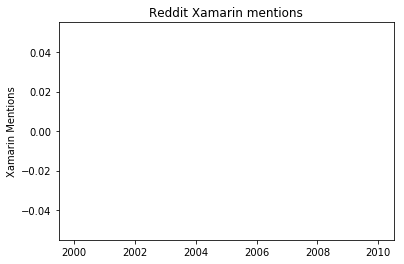

<Figure size 432x288 with 0 Axes>

In [8]:
#sort, number, and then graph the data
%matplotlib inline
import numpy
import matplotlib
import matplotlib.pyplot as plt
count = numpy.arange(len(python_xamarin_results_cleaned))
#Date_Data = matplotlib.dates.datestr2num(clean_python_results_utc)
Date_Data = []
Body_Data = []
for date, body in python_xamarin_results_cleaned:
    Date_Data.append(date)
    Body_Data.append(body)
matplotlib.pyplot.plot_date(Date_Data,count,xdate=True, drawstyle = 'steps-pre', linestyle = 'solid' )
matplotlib.pyplot.ylabel('Xamarin Mentions')
matplotlib.pyplot.title('Reddit Xamarin mentions')
plt.show()
plt.savefig('Reddit_xamarin.png')

In [9]:
import pandas
pandas_df = pandas.DataFrame({'date':Date_Data,'body':Body_Data})
pandas_df.to_csv("Reddit_xamarin.csv")
pandas_df

,body,date


In [10]:
#find flutter posts that already contain xamarin and export to csv
pandas_df[pandas_df['body'].str.contains('flutter')].to_csv('Reddit_xamarin_flutter_cross.csv')

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [ ]:
#repeat graphing and later csv export for flutter
count = numpy.arange(len(python_flutter_results_cleaned))
Date_Data = []
Body_Data = []
for date, body in python_flutter_results_cleaned:
    Date_Data.append(date)
    Body_Data.append(body)
matplotlib.pyplot.plot_date(Date_Data,count,xdate=True, drawstyle = 'steps-pre', linestyle = 'solid' )
matplotlib.pyplot.ylabel('Flutter Mentions')
matplotlib.pyplot.title('Reddit Flutter mentions')
plt.show()
plt.savefig('Reddit_flutter.png')

#print csv for flutter
pandas_df = pandas.DataFrame({'date':Date_Data,'body':Body_Data})
pandas_df.head()
pandas_df.to_csv("Reddit_flutter.csv")

In [ ]:
#repeat graphing and later csv export for react native
count = numpy.arange(len(python_react_native_results_cleaned))
Date_Data = []
Body_Data = []
for date, body in python_react_native_results_cleaned:
    Date_Data.append(date)
    Body_Data.append(body)
matplotlib.pyplot.plot_date(Date_Data,count,xdate=True, drawstyle = 'steps-pre', linestyle = 'solid' )
matplotlib.pyplot.ylabel('React Native Mentions')
matplotlib.pyplot.title('Reddit React Native mentions')
plt.show()
plt.savefig('Redditreact_native.png')

#print csv for flutter
pandas_df = pandas.DataFrame({'date':Date_Data,'body':Body_Data})
pandas_df.head()
pandas_df.to_csv("Reddit_react_native.csv")